# Лабораторная работа №7
## Решение задачи Коши
### Выполнил: студент 430 группы Кудряшов Андрей

## Цель работы: ознакомиться с методами решения дифференциальных уравнений; решить задачу коши с помощью неявной схемы Роте

## Заданное уранение
$$y"+9y'-9y=e^{-x}\cdot cos(3x)$$
### Начальные условия:
$$y(0)=1$$
$$y'(0)=0$$
### Решение нужно найти на промежутке $x\in[0;2]$

В общем виде линейное уравнение второго порядка выглядит следующим образом
$$y"+cy'+dy=f(x)$$
Разобьем данное уранение второго порядка на систему двух уравнений первого порядка:
$$y_1'=y_2=g_1$$
$$y_2'=-cy_2-dy_1+f(x)=g_2$$
Решение задачи Коши эквивалентно решению системы интегральных уравнений
$$y^{i+1}_k=y^i_k+\int\limits_{x_i}^{x_{i+1}}g_kdx$$
с заданными начальными условиями
$$\;$$
Схема Роте является неявной схемой, где интегрирование заменяется квадратурной формулой с весами
$$\;$$
$$y_k^{i+1}=y_k^i+h(\alpha g_k(x^i,y_1^i...) + \beta g_k(x^{i+1},y_1^{i+1}...))$$
$$\;$$
где $h$-шаг, определяемый относительной погрешностью, $\alpha$ и $\beta$ - веса квадратурной формулы
$$\;$$
Тогда для линейного уравнения второго порядка получаем:
$$\;$$
$$y_1^{i+1}=y_1^i+h(\alpha y_2^i+\beta y_2^{i+1})$$
$$y_2^{i+1}=y_2^i+h(\alpha(-cy_2^i-dy_1^i+f(x^i))+\beta(-cy_2^{i+1}-dy_1^{i+1}+f(x^{i+1}))$$
$$\;$$
перeносим неизвестные $y_1^{i+1}$ и $y_2^{i+1}$ в левую часть и решаем относитьно них систему для всех $x^i$
$$\;$$
$$\begin{pmatrix}1 & -h\beta \\ h\beta d & 1+h\beta c \end{pmatrix}\cdot \begin{pmatrix}y_1^{i+1} \\ y_2^{i+1} \end{pmatrix}=\begin{pmatrix}y^i_1+h\alpha y_2^i \\ y_2^i+h\alpha(-cy_2^i-dy_1^i+f(x^i))+h\beta f(x^{i+i} \end{pmatrix} $$
$$\;$$
В нашей задаче $c=9$, $d=-9$, $\alpha=\frac{1}{3}$, $\beta=\frac{2}{3}$, $f(x)=e^{-x}\cdot cos(3x)$

In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
%matplotlib inline
def f(x):
    return m.cos(3*x)*m.e**(-x) #правая часть уравнения
c=9 ; d=-9        #коэффициенты при слагаемых в левой части
a=1/3 ; b=2/3     #веса в схеме Роте
Y1=[1] ; Y2=[0]   #начальные условия
x0=0 ; x1=2       #интервал
e=0.0001            #относительная точность
h=1               #начальный шаг
k=0               #счетчик итераций
while 1:
    X=np.arange(x0,x1+2*h,h)
    n=1
    r=0
    i=0
    Y1old=Y1
    Y2old=Y2
    Y1=[1]
    Y2=[0]
    while i<(x1+h)/h:
        A=[[1.,-h*b],
          [d*h*b,1.+c*h*b]]
        B=[Y1[i]+h*a*Y2[i],Y2[i]+h*a*(-d*Y1[i]-c*Y2[i]+f(X[i]))+h*b*f(X[i+1])]
        C=np.linalg.solve(A,B)
        Y1.append(C[0])
        Y2.append(C[1])
        i+=1
    if k>0:
        i=0
        while i<(x1+2*h)/(2*h):
            delta=abs((Y1old[i]-Y1[2*i])/Y1old[i])  #Проверка точности
            if delta>e:
                r+=1
            i+=1
        n=r
    k+=1
    if n==0:
        break
    h=h/2
        
print("шаг",h)
print(k,"итераций")

шаг 0.000244140625
13 итераций


### Для сравнения найдем точное решение уравнения:
$$y=C_1e^{\lambda_1 x}+C_2e^{\lambda_2 x}+e^{-x}(Acos(3x)+Bsin(3x))$$
$$\;$$
Нетрудно убедиться, что$$\;$$
$\lambda_1=-9+3\sqrt{13}$, $\lambda_2=-9-3\sqrt{13}$, $A=-\frac{26}{1117}$, $B=\frac{21}{1117}$, $C_1=\frac{(1-A)\lambda_2-A+3B}{\lambda_2-\lambda_1}$, $C_2=\frac{(-1+A)\lambda_1+A-3B}{\lambda_2-\lambda_1}$

In [2]:
l1=(-9+3*m.sqrt(13))/2
l2=(-9-3*m.sqrt(13))/2
c1=((1+26/1117)*l2+26/1117+63/1117)/((l2-l1))
c2=(-(1+26/1117)*l1-26/1117-63/1117)/((l2-l1))
def ex(t):
    ex=c1*m.e**(l1*t)+c2*m.e**(l2*t)+m.e**(-t)*((-26/1117)*m.cos(3*t)+63/1117*m.sin(3*t))
    return ex
T=np.arange(0,2+2*h,h)
exn=[ex(t) for t in T]

### Построим графики точного решения и решения, найденного по схеме Роте:

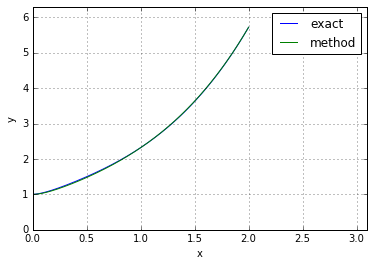

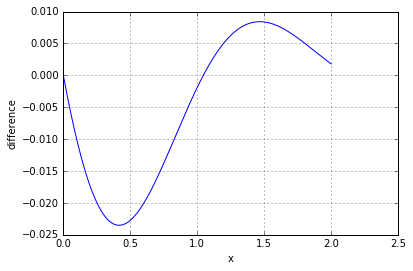

In [3]:
plt.plot(T,exn)
plt.plot(X,Y1)
plt.xlim(0,3.1)
plt.ylim(0,6.3)
plt.xlabel('x')
plt.ylabel('y')
plt.legend ( ('exact','method') )
plt.grid()
plt.show()
plt.plot(X,np.array(Y1)-np.array(exn))
plt.xlabel('x')
plt.ylabel(('difference'))
plt.grid()
plt.show()    